## <font color=violet>**Problem Statement**:

*   **To predict the retention potential of retail customers as high, medium, or low, I need to first train a machine learning model using** **historical data that includes customer information and a label indicating the retention potential of each customer** **(high, medium, or** **low).**
 
 **Once I have trained the model, I can use it to make predictions on new data by providing it with the necessary customer information**. **The model will output a predicted retention potential level for each customer**.


* **Customer Segmentation & Pattern Extraction**


##  **Objectives:**


1.   **To do exploratory Data Analysis using visualizations**
2.   **To build the analytical framework to predict the retail customer retention potential level as high/medium/low** 
3. **to  segment the customers into different  categories from the standpoint of customer retention which will be used for strategic purposes**
4. **to extract the top 5 patterns for each level in the target attribute**






## <font color=blue>Customer Retention:
**Customer retention is a variety of activities aimed at keeping customers for the long term and turning them into loyal buyers. The end goal is transforming first-time customers into repeat customers and maximizing their lifetime value.**

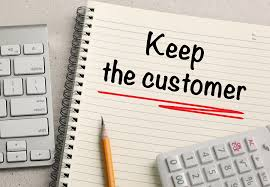

# <font color=brown>Why Customer retention important?

          
**          **Customer retention measures not only how successful a company is at acquiring new customers but also how successful they are at satisfying existing customers.** **It also increases ROI, boosts loyalty, and brings in new customers**.**


# **Goal:01**
**Expected to classify each customer as high/medium/low under the target attribute “RententionPotential”.** **Here identifying the medium level customers is important as this category  indicates where some intelligent** **action may lead to high possibility of retaining the customers who are likely to churn**.


# **Data Dictionary**

*   **There are multiple variables in the dataset which can be divided in 4 categories:**

**Note:** **"CustomerID" is common for all the  4 categories**


# **Customerdata**
*  **City**-City of the Customer i.e(City1,City2,City3,City4)
*  **DateOfRegistration**-Customer registered Date
*  **OnlineCommunication-**the customer is in online communication or not
*  **AutomaticRefill-**The customer is automatic refilled or not
*  **DoorstepDelivery-**wheather the order is delivered doorstep or not
*  **PreferredDeliveryDay-**The day at which the order is delivered

# **Emaildata**   
* **DateOfemail-** Customer recevied email date
* **EmailType-** Email type i.e(welcome,customized)
* **Timestamp-** Customer recevied email time
* **MailOpened-**	wheather the customer opened mail or not 
* **MailClicked-** wheather the customer clicked mail or not
 
# **Traindata**
* **RetentionPotential-** Repetition of customers i.e(low,medium,high)

# **Transactionsdata**

* **DateOfOrder-**The Date at which the order is placed
* **Timestamp-**The time at which the customer is ordered
* **OrderQuantity-**  The Quantity of orders




# Import Required Libraries

In [1]:
## Pandas and Numpy
import pandas as pd 
import numpy as np

## Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
### Mounted to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# TrainData

In TrainData there is four Datasets:
                                    1.Customerdata_Train
                                    2.Emaildata_Train
                                    3.Train
                                    4.transactionsdata_Train

In [3]:
##Reading the file
Customerdata_Train = pd.read_excel("/content/drive/MyDrive/final Hackathon/DataForPHD/TrainData/Customerdata_Train.xlsx")
Customerdata_Train.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [4]:
Customerdata_Train.shape

(23820, 7)

In [5]:
Emaildata_Train = pd.read_excel("/content/drive/MyDrive/final Hackathon/DataForPHD/TrainData/Emaildata_Train.xlsx")
Emaildata_Train.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [6]:
Emaildata_Train.shape

(517672, 6)

In [7]:
Train = pd.read_excel("/content/drive/MyDrive/final Hackathon/DataForPHD/TrainData/Train.xlsx")
Train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [8]:
Train.shape

(23820, 2)

In [9]:
transactionsdata_Train = pd.read_excel("/content/drive/MyDrive/final Hackathon/DataForPHD/TrainData/transactionsdata_Train.xlsx")
transactionsdata_Train.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [10]:
transactionsdata_Train.shape

(104755, 4)

In [11]:
# Extract Total order quantity with respect to every customer
total_order_quan = transactionsdata_Train.groupby("CustomerID")['OrderQuantity'].sum().sort_values(ascending=False)
total_order_quan

CustomerID
C33945    51429
C22341    34060
C16810    30562
C33514    26396
C32883    26091
          ...  
C13609        1
C33021        1
C35379        1
C28639        1
C15837        0
Name: OrderQuantity, Length: 23820, dtype: int64

## <font color = green>Exploratory Data Analysis with Total order quantity w.r.t Customer

Text(0.5, 1.0, 'Top 20 Customer_Id who have given Maximumn Orders')

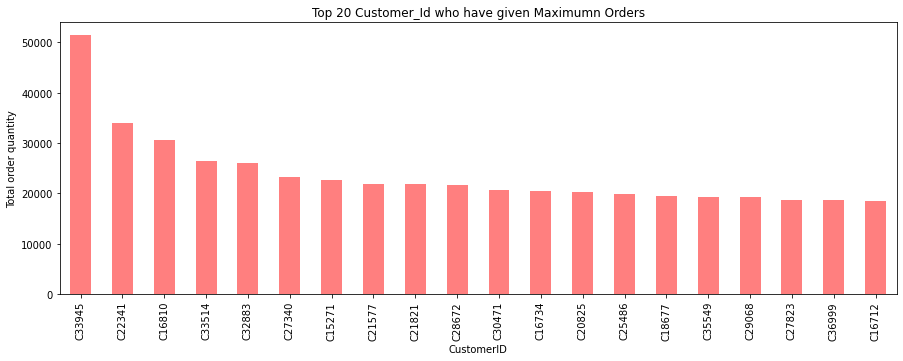

In [12]:
plt.figure(figsize = (15,5))
total_order_quan.head(20).plot(kind = "bar",color = "red",alpha=0.5)
plt.ylabel("Total order quantity")
plt.title("Top 20 Customer_Id who have given Maximumn Orders")


## <font color=violet>**Insights**:
 We have 23820 records, it is not possible to show all customers therefore we have shown only top 20 customer_id who has given max orders

In [13]:
#### Merging Train, Transactiondata on CustomerID to perform some analysis
total_order_Train = pd.merge(total_order_quan,Train,on=["CustomerID"],how="inner")
total_order_Train.head()

,CustomerID,OrderQuantity,RetentionPotential
0,C33945,51429,Low
1,C22341,34060,Low
2,C16810,30562,Low
3,C33514,26396,Low
4,C32883,26091,Medium


In [14]:
### Categorising the columns into three encoded columns by performing get_dummies and concatenating total email data.
Email_Type = pd.get_dummies(Emaildata_Train.EmailType,prefix="Email_Type")
Mail_Clicked = pd.get_dummies(Emaildata_Train.MailClicked,prefix="Mail_Clicked")
Mail_Opened = pd.get_dummies(Emaildata_Train.MailOpened,prefix="Mail_Opened")

In [15]:
## Checking the top 5 records of the email merged data
email_merged = pd.concat([Emaildata_Train,Email_Type,Mail_Clicked,Mail_Opened],axis = 1)
email_merged.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,0,1,1,0,0,0,1
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable,0,1,1,0,0,0,1
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,0,1,1,0,0,0,1
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable,0,1,1,0,0,0,1
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable,0,1,1,0,0,0,1


In [16]:
## Droping the irrelavent columns after merging to remove the redundancy
email_merged.drop(['EmailType','MailOpened','MailClicked','timestamp','DateOfemail'],axis=1)
email_total = email_merged.groupby('CustomerID').sum().reset_index()
email_total.head()

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes
0,C12116,31.0,1.0,1.0,29.0,2.0,27.0,5.0
1,C12117,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,C12118,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,C12119,41.0,1.0,1.0,37.0,4.0,28.0,14.0
4,C12120,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [17]:
# Merging the Email data and Customerdata_Train
email_customer = pd.merge(email_total,Customerdata_Train,on=["CustomerID"],how="inner")
email_customer.head()

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C12116,31.0,1.0,1.0,29.0,2.0,27.0,5.0,CITY3,2013-09-23,0,0,0,Friday
1,C12117,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-12-05,1,0,0,Friday
2,C12118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-09-10,1,0,0,Wednesday
3,C12119,41.0,1.0,1.0,37.0,4.0,28.0,14.0,CITY2,2013-04-13,0,0,0,Monday
4,C12120,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2014-01-10,1,0,0,Tuesday


In [43]:
# Merging the email_customer and total_order_Train
total_df = pd.merge(email_customer,total_order_Train,on=["CustomerID"],how="inner")
total_df.head()

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential
0,C12116,31.0,1.0,1.0,29.0,2.0,27.0,5.0,CITY3,2013-09-23,0,0,0,Friday,115,Low
1,C12117,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-12-05,1,0,0,Friday,41,Low
2,C12118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-09-10,1,0,0,Wednesday,41,High
3,C12119,41.0,1.0,1.0,37.0,4.0,28.0,14.0,CITY2,2013-04-13,0,0,0,Monday,52,Low
4,C12120,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2014-01-10,1,0,0,Tuesday,31,Low


## <font color = brown> Data Preprocessing </font>

In [81]:
# Check the data dimensions
total_df.shape

(23820, 16)

In [20]:
# Sample Data Check
total_df.head()

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential
0,C12116,31.0,1.0,1.0,29.0,2.0,27.0,5.0,CITY3,2013-09-23,0,0,0,Friday,115,Low
1,C12117,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-12-05,1,0,0,Friday,41,Low
2,C12118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-09-10,1,0,0,Wednesday,41,High
3,C12119,41.0,1.0,1.0,37.0,4.0,28.0,14.0,CITY2,2013-04-13,0,0,0,Monday,52,Low
4,C12120,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2014-01-10,1,0,0,Tuesday,31,Low


In [21]:
# Checking the Data Types
total_df.dtypes

CustomerID                            object
Email_Type_CustomizedEmail           float64
Email_Type_WelcomeEmail              float64
Mail_Clicked_NotApplicable           float64
Mail_Clicked_no                      float64
Mail_Clicked_yes                     float64
Mail_Opened_no                       float64
Mail_Opened_yes                      float64
City                                  object
DateOfRegistration            datetime64[ns]
OnlineCommunication                    int64
AutomaticRefill                        int64
DoorstepDelivery                       int64
PreferredDeliveryDay                  object
OrderQuantity                          int64
RetentionPotential                    object
dtype: object

In [22]:
# Missing Value Check
total_df.isnull().sum() # No null values

CustomerID                    0
Email_Type_CustomizedEmail    0
Email_Type_WelcomeEmail       0
Mail_Clicked_NotApplicable    0
Mail_Clicked_no               0
Mail_Clicked_yes              0
Mail_Opened_no                0
Mail_Opened_yes               0
City                          0
DateOfRegistration            0
OnlineCommunication           0
AutomaticRefill               0
DoorstepDelivery              0
PreferredDeliveryDay          0
OrderQuantity                 0
RetentionPotential            0
dtype: int64

In [23]:
# Data Summary Understanding before data type conversions
total_df.describe(include = 'all')

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential
count,23820,23820.000000,23820.0,23820.0,23820.000000,23820.000000,23820.000000,23820.000000,23820,23820,23820.000000,23820.000000,23820.000000,23820,23820.000000,23820
unique,23820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2673,NaN,NaN,NaN,7,NaN,3
top,C12116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CITY4,2012-08-28 00:00:00,NaN,NaN,NaN,Tuesday,NaN,Low
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9143,356,NaN,NaN,NaN,5343,NaN,19185
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.732662,1.0,1.0,19.563854,1.168808,15.525273,6.207389,NaN,NaN,0.660411,0.094710,0.037615,NaN,357.622922,NaN
std,NaN,20.040546,0.0,0.0,19.168208,2.376062,17.239732,8.517405,NaN,NaN,0.473580,0.292821,0.190268,NaN,1335.649680,NaN
min,NaN,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,41.000000,NaN


### <font color = blue>Exploratory Data Analysis w.r.t Target Variable "RetentionPotential"</font>


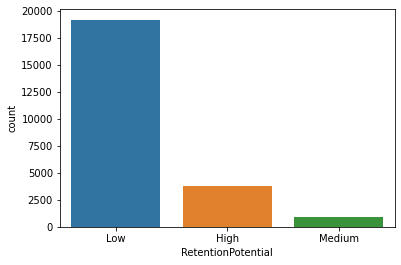

In [24]:
sns.countplot(data = total_df , x = 'RetentionPotential',order = total_df['RetentionPotential'].value_counts().index)

## <font color=green>**Insights**: <font color=blue>
 From the above plot we conclude that our Retention potential is very Low




In [25]:
total_df['RetentionPotential'].value_counts()

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

In [26]:
total_df.groupby("City")['OrderQuantity'].sum().sort_values(ascending=False)

City
CITY2    4380420
CITY4    2778114
CITY3    1098124
CITY1     261920
Name: OrderQuantity, dtype: int64

Text(0.5, 0, 'OrderQuantity')

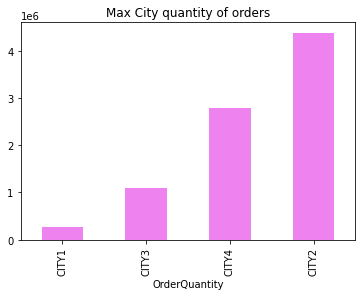

In [27]:
total_df.groupby("City")['OrderQuantity'].sum().sort_values(ascending=True).plot(kind = "bar", color = "violet")
plt.title("Max City quantity of orders")
plt.xlabel("OrderQuantity")


###<font color=red>**Insights**:
- From city 2 we recieved max quantity of orders `4380420` 
- From city 1 we recieved least quantity of orders `261920`

In [28]:
total_df['DoorstepDelivery'].value_counts()

0    22924
1      896
Name: DoorstepDelivery, dtype: int64

Text(0, 0.5, 'count')

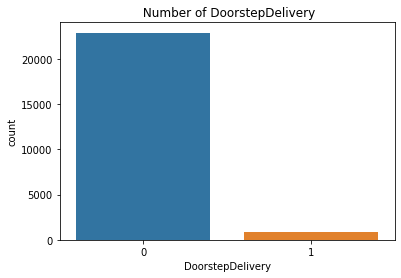

In [29]:
sns.countplot( x = 'DoorstepDelivery', data =total_df ,palette= "tab10")
plt.title(" Number of DoorstepDelivery")
plt.ylabel("count")

###<font color=orange>**Insights**:

*  From the above Plot there is less Number of DoorstepDeliveries i.e,896






In [30]:
total_df['PreferredDeliveryDay'].value_counts()

Tuesday      5343
Monday       5300
Friday       4167
Thursday     4043
Wednesday    3778
Saturday     1003
Sunday        186
Name: PreferredDeliveryDay, dtype: int64

Text(0, 0.5, 'count')

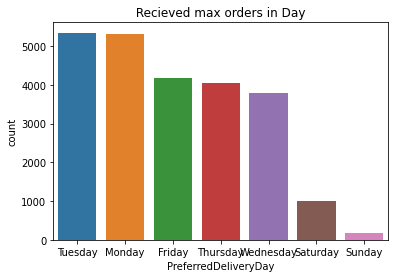

In [31]:
sns.countplot( x = 'PreferredDeliveryDay', data =total_df ,palette= "tab10",
order = total_df['PreferredDeliveryDay'].value_counts().index)
plt.title(" Recieved max orders in Day ")
plt.ylabel("count")

<font color=blue>***Insights***:
- Max orders are delievered on weekdays i.e(tuesday and monday)
-Least orders are delivered on weekends i.e(saturday and sunday)


In [32]:
total_df['AutomaticRefill'].value_counts()

0    21564
1     2256
Name: AutomaticRefill, dtype: int64

Text(0, 0.5, 'count')

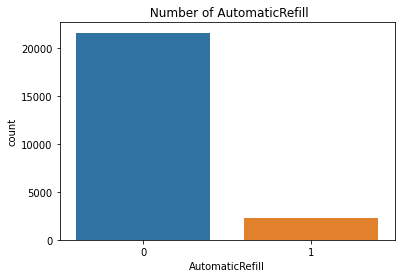

In [33]:
sns.countplot( x = 'AutomaticRefill', data =total_df ,palette= "tab10")
plt.title(" Number of AutomaticRefill")
plt.ylabel("count")

## Changing datatype of Emaildata_Train column to datetime




In [34]:
Emaildata_Train.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [35]:
# Convert variable to Date
Emaildata_Train['DateOfemail'] = pd.to_datetime(Emaildata_Train['DateOfemail'])
Emaildata_Train.dtypes

CustomerID             object
DateOfemail    datetime64[ns]
EmailType              object
timestamp              object
MailOpened             object
MailClicked            object
dtype: object

#### Extract **date** **month** and **year** from Emaildata_Train

In [36]:
Emaildata_Train['day'] = Emaildata_Train['DateOfemail'].dt.day
Emaildata_Train['month'] = Emaildata_Train['DateOfemail'].dt.month
Emaildata_Train['year'] = Emaildata_Train['DateOfemail'].dt.year

#### Convert **month numbers** to **month name** 

In [37]:
import calendar
Emaildata_Train['month'] = Emaildata_Train['month'].apply(lambda x: calendar.month_abbr[x])

In [38]:
## Drop dateofemail column
Emaildata_Train.drop(columns="DateOfemail", inplace = True)

In [39]:
Emaildata_Train['month'].dtype

dtype('O')

'O' stands for object.

In [40]:
Emaildata_Train['month']

0         Sep
1         Dec
2         Oct
3         Nov
4         Dec
         ... 
517667    Jan
517668    Jan
517669    Jan
517670    Jan
517671    Jan
Name: month, Length: 517672, dtype: object

In [41]:
Emaildata_Train.head()

,CustomerID,EmailType,timestamp,MailOpened,MailClicked,day,month,year
0,C16368,WelcomeEmail,15:56:50,yes,NotApplicable,28,Sep,2012
1,C20345,WelcomeEmail,15:10:30,yes,NotApplicable,19,Dec,2010
2,C17683,WelcomeEmail,17:12:24,yes,NotApplicable,3,Oct,2010
3,C18647,WelcomeEmail,16:59:02,yes,NotApplicable,27,Nov,2010
4,C36692,WelcomeEmail,17:27:22,yes,NotApplicable,4,Dec,2009


### <font color=green>  Maximum customers open there mail in month<font>

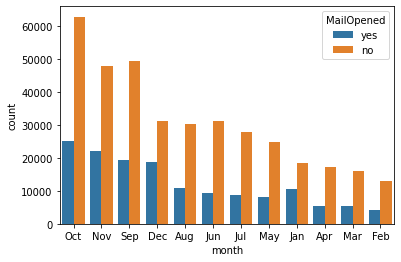

In [42]:
sns.countplot( x = 'month', data = Emaildata_Train,hue="MailOpened",
 order = Emaildata_Train['month'].value_counts().index);

<font color=blue>**Insights**:
- In oct month maximum number of customers opened there mail
- In Feb month least number of customers opened there mail 


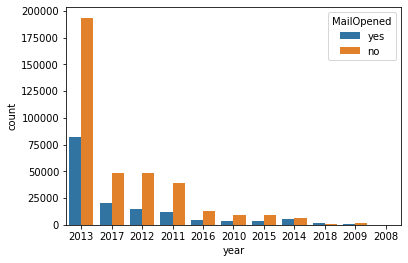

In [43]:
sns.countplot( x = 'year', data = Emaildata_Train,hue="MailOpened",
order = Emaildata_Train['year'].value_counts().index);

<font color=orange>**Insights**:
- In Year 2013 maximum number of customers opened there mails </b>
- In Year 2008 the least number of customers opened there mails 


#### Changing datatype of transactionsdata_Train column to datetime




In [44]:
transactionsdata_Train.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

In [45]:
## Convert DateOfOrder to datetime format
transactionsdata_Train['DateOfOrder'] = pd.to_datetime(transactionsdata_Train['DateOfOrder'])
transactionsdata_Train.dtypes

CustomerID               object
DateOfOrder      datetime64[ns]
timestamp                object
OrderQuantity             int64
dtype: object

In [46]:
# Extract day month and year from dateoforder
transactionsdata_Train['day'] = transactionsdata_Train['DateOfOrder'].dt.day
transactionsdata_Train['month'] = transactionsdata_Train['DateOfOrder'].dt.month
transactionsdata_Train['year'] = transactionsdata_Train['DateOfOrder'].dt.year

In [47]:
# Extract date month and year from Emaildata_Train
transactionsdata_Train['month'] = transactionsdata_Train['month'].apply(lambda x: calendar.month_abbr[x])

In [48]:
## Drop dateoforder column
transactionsdata_Train.drop(columns="DateOfOrder", inplace = True)

In [49]:
transactionsdata_Train.head()

,CustomerID,timestamp,OrderQuantity,day,month,year
0,C16368,15:17:52,15,11,Aug,2013
1,C20345,19:50:00,92,1,Apr,2011
2,C20345,15:11:56,95,29,Jun,2012
3,C20345,20:49:10,74,22,Sep,2012
4,C20345,11:50:26,81,23,Aug,2011


In [50]:
transactionsdata_Train['month'].dtype

dtype('O')

In [51]:
pd.DataFrame(transactionsdata_Train.groupby('month')['OrderQuantity'].sum().sort_values(ascending=False))

,OrderQuantity
month,
Nov,953470
Oct,952084
Dec,874348
Sep,838980
Jan,779189
Aug,678259
Jul,659469
Jun,644424
May,627026


Text(0, 0.5, 'count')

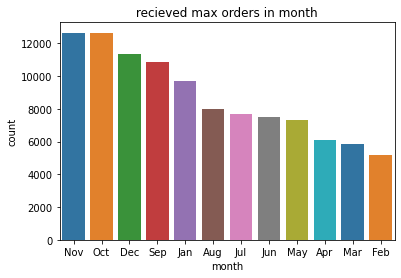

In [52]:
sns.countplot( x = 'month', data =transactionsdata_Train ,palette= "tab10",
order = transactionsdata_Train['month'].value_counts().index)
plt.title(" recieved max orders in month ")
plt.ylabel("count")

#### **Insights**:
- Nov month has maximum orders 9,53,470
- Feb month has least orders 4,58,994

In [53]:
pd.DataFrame(transactionsdata_Train.groupby('year')['OrderQuantity'].sum().sort_values(ascending=False))

,OrderQuantity
year,
2013,3186085
2012,1812969
2011,1287628
2017,739904
2016,447635
2015,328761
2014,328548
2010,276890
2018,73550


Text(0, 0.5, 'count')

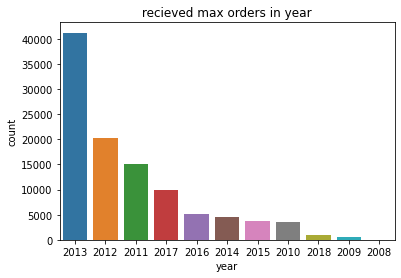

In [54]:
sns.countplot( x = 'year', data =transactionsdata_Train ,palette= "tab10",
order = transactionsdata_Train['year'].value_counts().index)
plt.title(" recieved max orders in year ")
plt.ylabel("count")

<font color=orange>**Insights**:
- In 2013 has maximum orders 3186085
- In 2008 has least orders 1237


In [55]:
total_df

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential
0,C12116,31.0,1.0,1.0,29.0,2.0,27.0,5.0,CITY3,2013-09-23,0,0,0,Friday,115,Low
1,C12117,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-12-05,1,0,0,Friday,41,Low
2,C12118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-09-10,1,0,0,Wednesday,41,High
3,C12119,41.0,1.0,1.0,37.0,4.0,28.0,14.0,CITY2,2013-04-13,0,0,0,Monday,52,Low
4,C12120,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2014-01-10,1,0,0,Tuesday,31,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,43.0,1.0,1.0,43.0,0.0,34.0,10.0,CITY2,2011-03-03,0,0,0,Tuesday,1340,Low
23816,C42186,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-11-23,1,0,0,Friday,46,High
23817,C42187,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-09-15,1,0,0,Tuesday,41,High
23818,C42188,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2011-10-04,0,0,0,Friday,51,Low


In [19]:
##Segregate numerical and categorical features
num_features = [fea for fea in total_df.columns if total_df[fea].dtypes != "O"]##numerical features
num_features

['Email_Type_CustomizedEmail',
 'Email_Type_WelcomeEmail',
 'Mail_Clicked_NotApplicable',
 'Mail_Clicked_no',
 'Mail_Clicked_yes',
 'Mail_Opened_no',
 'Mail_Opened_yes',
 'DateOfRegistration',
 'OnlineCommunication',
 'AutomaticRefill',
 'DoorstepDelivery',
 'OrderQuantity']

In [20]:
categorical_features = [fea for fea in total_df.columns if total_df[fea].dtypes == "O"]##categorical features
categorical_features

['CustomerID', 'City', 'PreferredDeliveryDay', 'RetentionPotential']

<font color=voilet>**Univariate analysis**


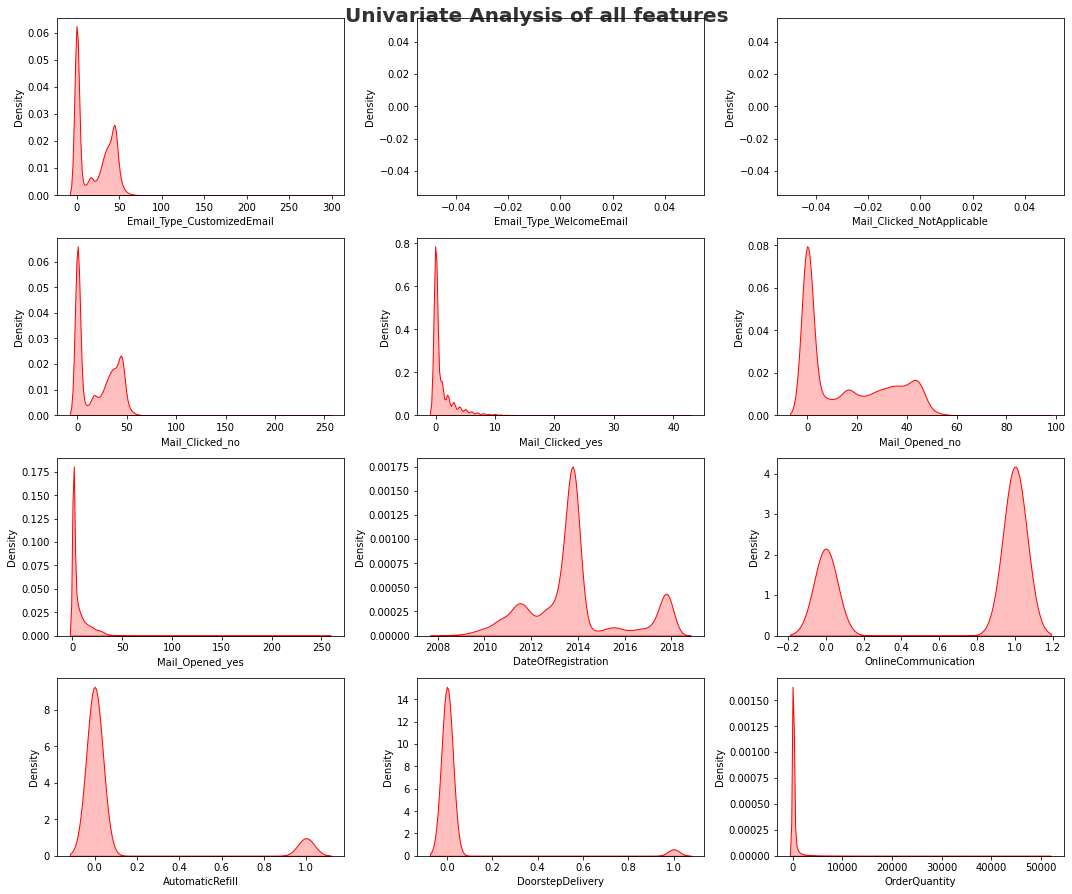

In [58]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(num_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(total_df[num_features[i]], shade =True, color='r')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [21]:
total_df[categorical_features] = total_df[categorical_features].astype('category')

In [22]:
total_df.dtypes

CustomerID                          category
Email_Type_CustomizedEmail           float64
Email_Type_WelcomeEmail              float64
Mail_Clicked_NotApplicable           float64
Mail_Clicked_no                      float64
Mail_Clicked_yes                     float64
Mail_Opened_no                       float64
Mail_Opened_yes                      float64
City                                category
DateOfRegistration            datetime64[ns]
OnlineCommunication                    int64
AutomaticRefill                        int64
DoorstepDelivery                       int64
PreferredDeliveryDay                category
OrderQuantity                          int64
RetentionPotential                  category
dtype: object

In [ ]:
total_df.drop(['CustomerID','DateOfRegistration','Email_Type_WelcomeEmail','Mail_Clicked_NotApplicable' ],axis=1,inplace=True)

# <font color=orange>**Creating Independent and Dependent Features**


In [ ]:
##Dividing the dataset into independent and dependent features
x = total_df.drop(['RetentionPotential'],axis = 1)##independent features
y = total_df['RetentionPotential']##dependent features

In [ ]:
x.head()

,Email_Type_CustomizedEmail,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity
0,31.0,29.0,2.0,27.0,5.0,CITY3,0,0,0,Friday,115
1,0.0,0.0,0.0,0.0,1.0,CITY2,1,0,0,Friday,41
2,0.0,0.0,0.0,0.0,1.0,CITY4,1,0,0,Wednesday,41
3,41.0,37.0,4.0,28.0,14.0,CITY2,0,0,0,Monday,52
4,0.0,0.0,0.0,0.0,1.0,CITY3,1,0,0,Tuesday,31


In [ ]:
y

0         Low
1         Low
2        High
3         Low
4         Low
         ... 
23815     Low
23816    High
23817    High
23818     Low
23819     Low
Name: RetentionPotential, Length: 23820, dtype: category
Categories (3, object): ['High', 'Low', 'Medium']

# **Train Test Split**


In [ ]:
## Splitting the Dataset into Train And Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
# Check the data dimensions of X_train and y_train
X_train.shape,y_train.shape


((19056, 11), (19056,))

In [ ]:
# Check the data dimensions of X_test and y_test
X_test.shape,y_test.shape


((4764, 11), (4764,))

In [ ]:
y_train.value_counts()

Low       15386
High       2974
Medium      696
Name: RetentionPotential, dtype: int64

In [ ]:
y_test.value_counts()

Low       3799
High       782
Medium     183
Name: RetentionPotential, dtype: int64

##<font color=red> **Convert categorical to numerical**


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [ ]:
pd.value_counts(y_train)

1    15386
0     2974
2      696
dtype: int64

##<font color=green>By using Label encoder the output will be in array [0, 1, 2], which represents the numerical labels for the categorical values "High", "Low", and "Medium".

In [ ]:
cat_attr = X_train.select_dtypes(include=['category']).columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop = 'first')
enc.fit(X_train[cat_attr])
X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_test_ohe=enc.transform(X_test[cat_attr]).toarray()

In [ ]:
print(X_train_ohe.shape)
print(X_test_ohe.shape)

(19056, 9)
(4764, 9)


# <font color=blue>**Standardize numerical variables**

In [ ]:
num_attr = X_train.select_dtypes(include=['int64','float64']).columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_attr])
X_train_std = scaler.transform(X_train[num_attr])
X_test_std = scaler.transform(X_test[num_attr])

In [ ]:
print(X_train_std.shape)
print(X_test_std.shape)


(19056, 9)
(4764, 9)


**Concatenate attribute Standardised numeric attributes and One hot encoded categorical attributes**

In [ ]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [ ]:
print(X_train_con.shape)
print(X_test_con.shape)

(19056, 18)
(4764, 18)


# <font color=brown> **Model building**

# <font color=blue>**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(X_train_con, y_train)

train_pred_rf = clf1.predict(X_train_con)
test_pred_rf = clf1.predict(X_test_con)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


In [ ]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Recall   : ", recall_score(act, pred,average='macro'))
    
    

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_rf)
print("--Test--")
evaluate_model(y_test, test_pred_rf)

--Train--
Confusion Matrix 
 [[ 2148   823     3]
 [  247 15139     0]
 [    1    34   661]]
Recall   :  0.8853062238504181
--Test--
Confusion Matrix 
 [[ 377  389   16]
 [ 198 3593    8]
 [  24   35  124]]
Recall   :  0.7018226730390401


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.48      0.55       782
           1       0.89      0.95      0.92      3799
           2       0.84      0.68      0.75       183

    accuracy                           0.86      4764
   macro avg       0.79      0.70      0.74      4764
weighted avg       0.85      0.86      0.85      4764



# **Hyper Parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion":['gini','entropy'],
              "n_estimators": [50,100],
              "max_depth":[1,5],
              "max_features":['auto','sqrt','log2'],
              "min_samples_split":[2,4],
              "min_samples_leaf":[1,2,4],
              "random_state":[0,1] }
clf = RandomForestClassifier()
clf_grid = GridSearchCV(clf,param_grid,cv=4)
clf_grid.fit(X_train_con,y_train)
print(clf_grid.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}


In [ ]:
clf_grid = RandomForestClassifier(class_weight='balanced',
                                  criterion='gini',
                                  max_depth = 5, 
                                  max_features = 'auto', 
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_estimators =  100,
                                  random_state=0)
clf_grid.fit(X_train_con,y_train)

train_pred_grid = clf_grid.predict(X_train_con)
test_pred_grid = clf_grid.predict(X_test_con)


In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_grid)
print("--Test--")
evaluate_model(y_test, test_pred_grid)

--Train--
Confusion Matrix 
 [[ 2658   163   153]
 [ 4637 10110   639]
 [   17    32   647]]
Recall   :  0.8268114532927949
--Test--
Confusion Matrix 
 [[ 704   44   34]
 [1181 2428  190]
 [   5   15  163]]
Recall   :  0.8100272312382728


In [ ]:
# Classification Report train data
from sklearn.metrics import classification_report
print(classification_report(y_train,train_pred_grid))

              precision    recall  f1-score   support

           0       0.36      0.89      0.52      2974
           1       0.98      0.66      0.79     15386
           2       0.45      0.93      0.61       696

    accuracy                           0.70     19056
   macro avg       0.60      0.83      0.64     19056
weighted avg       0.87      0.70      0.74     19056



In [ ]:
# Classification Report for test data
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_grid))

              precision    recall  f1-score   support

           0       0.37      0.90      0.53       782
           1       0.98      0.64      0.77      3799
           2       0.42      0.89      0.57       183

    accuracy                           0.69      4764
   macro avg       0.59      0.81      0.62      4764
weighted avg       0.86      0.69      0.72      4764



# <font color=blue>Observations:

  
*   **So we can see that after hyperparameter tunning the difference between our trainig and test Recall is reduced .. that mean our model will not be overfitted and its recall is 82%.**

*  **By using classification report we can say that for medium customers its recall is 89%.**

# <font color=brown>**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(X_train_con, y_train)

train_pred_dtc = dtc.predict(X_train_con)
test_pred_dtc = dtc.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_dtc)
print("--Test--")
evaluate_model(y_test, test_pred_dtc)

--Train--
Confusion Matrix 
 [[ 2249   725     0]
 [  345 15041     0]
 [    4    34   658]]
Recall   :  0.8930666317548703
--Test--
Confusion Matrix 
 [[ 405  357   20]
 [ 280 3488   31]
 [  21   34  128]]
Recall   :  0.7118309056277644


In [ ]:
# Classification Report train data
from sklearn.metrics import classification_report
print(classification_report(y_train,train_pred_dtc))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      2974
           1       0.95      0.98      0.96     15386
           2       1.00      0.95      0.97       696

    accuracy                           0.94     19056
   macro avg       0.94      0.89      0.91     19056
weighted avg       0.94      0.94      0.94     19056



In [ ]:
# Classification Report test data
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       782
           1       0.90      0.92      0.91      3799
           2       0.72      0.70      0.71       183

    accuracy                           0.84      4764
   macro avg       0.73      0.71      0.72      4764
weighted avg       0.84      0.84      0.84      4764



**Parameter tuning**


In [ ]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],
            'splitter':['best','random'],
            "max_depth":[2, 3, 5, 10, 20],
            'max_features':['auto','sqrt','log2'],
            "min_samples_split":[1,2,4],
            "min_samples_leaf":[1,2,3,4]}
dt=DecisionTreeClassifier()
clf1=GridSearchCV(dt,parameters,cv=4)
clf1.fit(X_train_con,y_train)
print(clf1.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
clf1= DecisionTreeClassifier(class_weight='balanced',
                             criterion='entropy',
                             splitter='best',
                             max_depth=10,
                             max_features='log2',
                             min_samples_split= 4,
                             min_samples_leaf= 3)
clf1.fit(X_train_con,y_train)

train_pred_dt = clf1.predict(X_train_con)
test_pred_dt = clf1.predict(X_test_con)


In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_dt)
print("--Test--")
evaluate_model(y_test, test_pred_dt)

--Train--
Confusion Matrix 
 [[ 2671   145   158]
 [ 4501 10209   676]
 [   25     6   665]]
Recall   :  0.8390340223206305
--Test--
Confusion Matrix 
 [[ 680   59   43]
 [1146 2452  201]
 [  13   17  153]]
Recall   :  0.7836879332827641


In [ ]:
# Classification Report train data
from sklearn.metrics import classification_report
print(classification_report(y_train,train_pred_dt))

              precision    recall  f1-score   support

           0       0.37      0.90      0.53      2974
           1       0.99      0.66      0.79     15386
           2       0.44      0.96      0.61       696

    accuracy                           0.71     19056
   macro avg       0.60      0.84      0.64     19056
weighted avg       0.87      0.71      0.74     19056



In [ ]:
# Classification Report test data
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_dt))

              precision    recall  f1-score   support

           0       0.37      0.87      0.52       782
           1       0.97      0.65      0.78      3799
           2       0.39      0.84      0.53       183

    accuracy                           0.69      4764
   macro avg       0.58      0.78      0.61      4764
weighted avg       0.85      0.69      0.72      4764



# <font color=blue>Observations:

  
*   **So we can see that after hyperparameter tunning the difference between our trainig and test Recall is reduced .. that mean our model will not be overfitted and its recall is 89%.**

*  **By using classification report we can say that for medium customers its recall is 84%.**

# **AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(X_train_con,y_train)

train_pred_ada=clf2.predict(X_train_con)
test_pred_ada=clf2.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_ada)
print("--Test--")
evaluate_model(y_test, test_pred_ada)


--Train--
Confusion Matrix 
 [[ 1658  1200   116]
 [  900 14388    98]
 [   71   102   523]]
Recall   :  0.7480236460488016
--Test--
Confusion Matrix 
 [[ 454  308   20]
 [ 240 3533   26]
 [  21   34  128]]
Recall   :  0.7366659286191876


In [ ]:
# Classification Report train data
from sklearn.metrics import classification_report
print(classification_report(y_train,train_pred_ada))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      2974
           1       0.92      0.94      0.93     15386
           2       0.71      0.75      0.73       696

    accuracy                           0.87     19056
   macro avg       0.75      0.75      0.75     19056
weighted avg       0.86      0.87      0.87     19056



In [ ]:
# Classification Report test data
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_ada))

              precision    recall  f1-score   support

           0       0.63      0.58      0.61       782
           1       0.91      0.93      0.92      3799
           2       0.74      0.70      0.72       183

    accuracy                           0.86      4764
   macro avg       0.76      0.74      0.75      4764
weighted avg       0.86      0.86      0.86      4764



# <font color=blue>Observations:

*  **In AdaBoostClassifier the recall is 74% .By  using classification report we can say that for medium customers its recall is 70%.**

# **GradientBoost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_con,y_train)

GradientBoostingClassifier()

In [ ]:
train_pred_gbc = gbc.predict(X_train_con)
test_pred_gbc = gbc.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_gbc)
print("--Test--")
evaluate_model(y_test, test_pred_gbc)


--Train--
Confusion Matrix 
 [[ 1690  1220    64]
 [  710 14655    21]
 [   58    96   542]]
Recall   :  0.7664943820707619
--Test--
Confusion Matrix 
 [[ 460  311   11]
 [ 195 3594   10]
 [  14   30  139]]
Recall   :  0.7646121889379328


In [ ]:
# Classification Report Train data
from sklearn.metrics import classification_report
print(classification_report(y_train,train_pred_gbc))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62      2974
           1       0.92      0.95      0.93     15386
           2       0.86      0.78      0.82       696

    accuracy                           0.89     19056
   macro avg       0.82      0.77      0.79     19056
weighted avg       0.88      0.89      0.88     19056



In [ ]:
# Classification Report Test data
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_gbc))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63       782
           1       0.91      0.95      0.93      3799
           2       0.87      0.76      0.81       183

    accuracy                           0.88      4764
   macro avg       0.82      0.76      0.79      4764
weighted avg       0.87      0.88      0.88      4764



**Parameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['squared_error','mse'],
            'n_estimators':[150],
            'max_features':['auto','sqrt','log2'],
            'random_state':[0]}
gb=GradientBoostingClassifier()
clf3_grid=GridSearchCV(gb,parameters,cv=4)
clf3_grid.fit(X_train_con,y_train)
print(clf3_grid.best_params_)

{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 150, 'random_state': 0}


In [ ]:
clf3_grid=GradientBoostingClassifier(criterion="squared_error",
                                     n_estimators=150,
                                     max_features='sqrt')
clf3_grid.fit(X_train_con,y_train)

pred_train_gb = clf3_grid.predict(X_train_con)
pred_test_gb = clf3_grid.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, pred_train_gb)
print("--Test--")
evaluate_model(y_test, pred_test_gb)


--Train--
Confusion Matrix 
 [[ 1702  1208    64]
 [  712 14657    17]
 [   54    94   548]]
Recall   :  0.7707562646354127
--Test--
Confusion Matrix 
 [[ 458  315    9]
 [ 193 3597    9]
 [  12   31  140]]
Recall   :  0.7658443948087373


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63       782
           1       0.91      0.95      0.93      3799
           2       0.89      0.77      0.82       183

    accuracy                           0.88      4764
   macro avg       0.83      0.77      0.79      4764
weighted avg       0.87      0.88      0.88      4764



# <font color=blue>Observations:

*   **So we can see that after hyperparameter tunning there is no difference between our trainig and test Recall to our model.**

*  **By using classification report we can say that for medium customers its recall is 77%.**

# **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_con,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
train_pred_xgb = xgb.predict(X_train_con)
test_pred_xgb = xgb.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_xgb)
print("--Test--")
evaluate_model(y_test, test_pred_xgb)


--Train--
Confusion Matrix 
 [[ 1667  1244    63]
 [  739 14625    22]
 [   59   105   532]]
Recall   :  0.7584772712024094
--Test--
Confusion Matrix 
 [[ 455  318    9]
 [ 200 3587   12]
 [  16   31  136]]
Recall   :  0.7564022240476533


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63       782
           1       0.91      0.94      0.93      3799
           2       0.87      0.74      0.80       183

    accuracy                           0.88      4764
   macro avg       0.82      0.76      0.78      4764
weighted avg       0.87      0.88      0.87      4764



**Parameter Training**

In [ ]:
param_grid_xg={"learning_rate" :[0.1,0.01,0.001],
               "n_estimators": [1000,150,100],
               "max_depth": [1,2,3,4,5],
               "min_child_weight" : [1,3,5] }
clf4 = XGBClassifier()
clf4_grid_xgb = GridSearchCV(clf4,param_grid_xg,cv=4)
clf4_grid_xgb.fit(X_train_con,y_train)
print(clf4_grid_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}


In [ ]:
clf4_grid_xgb= XGBClassifier(class_weight='balanced',
                         learning_rate=0.1,
                         n_estimators=100,
                         max_depth=5,
                         min_child_weight=5)

clf4_grid_xgb.fit(X_train_con,y_train)

train_pred_grid_xgb = clf4_grid_xgb.predict(X_train_con)
test_pred_grid_xgb = clf4_grid_xgb.predict(X_test_con)


In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_grid_xgb)
print("--Test--")
evaluate_model(y_test, test_pred_grid_xgb)


--Train--
Confusion Matrix 
 [[ 1739  1184    51]
 [  731 14637    18]
 [   59    90   547]]
Recall   :  0.7739910953259462
--Test--
Confusion Matrix 
 [[ 461  311   10]
 [ 207 3582   10]
 [  13   30  140]]
Recall   :  0.7658070313620368


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_grid_xgb))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       782
           1       0.91      0.94      0.93      3799
           2       0.88      0.77      0.82       183

    accuracy                           0.88      4764
   macro avg       0.82      0.77      0.79      4764
weighted avg       0.87      0.88      0.87      4764



# <font color=blue>Observations:

*   **So we can see that after hyperparameter tunning there is no difference between our trainig and test Recall to our model.**

*  **By using classification report we can say that for medium customers its recall is 77%.**

# **Support vector classifier**

In [ ]:
from sklearn.svm import SVC


In [ ]:
svc = SVC(kernel='rbf', gamma=0.01, C=10)


In [ ]:
svc.fit(X_train_con, y_train)

SVC(C=10, gamma=0.01)

In [ ]:
train_pred_svc = svc.predict(X_train_con)
test_pred_svc = svc.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_svc)
print("--Test--")
evaluate_model(y_test, test_pred_svc)


--Train--
Confusion Matrix 
 [[ 1396  1561    17]
 [  644 14719    23]
 [  107   228   361]]
Recall   :  0.6482428473357666
--Test--
Confusion Matrix 
 [[ 373  406    3]
 [ 177 3607   15]
 [  40   60   83]]
Recall   :  0.6266647980222225


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred_svc))

              precision    recall  f1-score   support

           0       0.63      0.48      0.54       782
           1       0.89      0.95      0.92      3799
           2       0.82      0.45      0.58       183

    accuracy                           0.85      4764
   macro avg       0.78      0.63      0.68      4764
weighted avg       0.84      0.85      0.84      4764



**Parameter tuning**

In [ ]:
#perform gridsearchcv and cross val score on Support Vector classifier
parameters_svc ={'kernel':['linear','rbf'],
                 'tol':[0.01,0.001],
                 'shrinking':[True,False] }
svc=SVC()
clf5=GridSearchCV(svc,parameters_svc)
clf5.fit(X_train_con,y_train)
print(clf5.best_params_)

{'kernel': 'rbf', 'shrinking': True, 'tol': 0.01}


In [ ]:
clf5=SVC(class_weight='balanced',kernel='rbf',max_iter= -1, probability= True, shrinking= True, tol= 0.01)
clf5.fit(X_train_con,y_train)
pred_train_grid_svc=clf5.predict(X_train_con)
pred_test_grid_svc=clf5.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train,pred_train_grid_svc)
print("--Test--")
evaluate_model(y_test, pred_test_grid_svc)

--Train--
Confusion Matrix 
 [[ 2692   149   133]
 [ 4514 10002   870]
 [   49    16   631]]
Recall   :  0.8206196333770981
--Test--
Confusion Matrix 
 [[ 703   46   33]
 [1160 2391  248]
 [  14   10  159]]
Recall   :  0.7990685309108091


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test_grid_svc))

              precision    recall  f1-score   support

           0       0.37      0.90      0.53       782
           1       0.98      0.63      0.77      3799
           2       0.36      0.87      0.51       183

    accuracy                           0.68      4764
   macro avg       0.57      0.80      0.60      4764
weighted avg       0.85      0.68      0.72      4764



# <font color=blue>Observations:

  
*   **So we can see that after hyperparameter tunning the recall improved  our trainig and test recall will improved 62% to 87%**

*  **By using classification report we can say that for medium customers its recall is 87%.**

# **KNearest Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_con, y_train)
pred_train_knn = knn.predict(X_train_con)
pred_test_knn = knn.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, pred_train_knn)
print("--Test--")
evaluate_model(y_test, pred_test_knn)


--Train--
Confusion Matrix 
 [[ 1793  1147    34]
 [  659 14719     8]
 [  110   165   421]]
Recall   :  0.7214752291273862
--Test--
Confusion Matrix 
 [[ 415  348   19]
 [ 246 3547    6]
 [  43   48   92]]
Recall   :  0.6556965106435375


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       782
           1       0.90      0.93      0.92      3799
           2       0.79      0.50      0.61       183

    accuracy                           0.85      4764
   macro avg       0.76      0.66      0.70      4764
weighted avg       0.84      0.85      0.85      4764



**Parameter tuning**

In [ ]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters_knn={'n_neighbors':[4,5,6],
                'weights':['uniform', 'distance'],
                'leaf_size':[35,30],
                'n_jobs':[-1,1],
                'algorithm':['auto', 'ball_tree', 'kd_tree'] }

knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters_knn)
clf.fit(X_train_con,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
knn=KNeighborsClassifier(algorithm= 'kd_tree', leaf_size= 35, n_jobs= -1, n_neighbors= 5, weights= 'uniform')
knn.fit(X_train_con,y_train)
pred_train_knn_grid=knn.predict(X_train_con)
pred_test_knn_grid=knn.predict(X_test_con)


In [ ]:
print("--Train--")
evaluate_model(y_train, pred_train_knn_grid)
print("--Test--")
evaluate_model(y_test, pred_test_knn_grid)


--Train--
Confusion Matrix 
 [[ 1719  1221    34]
 [  566 14813     7]
 [  111   164   421]]
Recall   :  0.7152176080496652
--Test--
Confusion Matrix 
 [[ 393  370   19]
 [ 222 3571    6]
 [  43   48   92]]
Recall   :  0.648424663854763


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test_knn_grid))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       782
           1       0.90      0.94      0.92      3799
           2       0.79      0.50      0.61       183

    accuracy                           0.85      4764
   macro avg       0.76      0.65      0.69      4764
weighted avg       0.84      0.85      0.84      4764



# <font color=blue>Observations:

  
*   **We can see that after hyperparameter tunning there is not much difference between our trainig and test Recall.**

*  **By using classification report we can say that for medium customers its recall is 50%.**

# **Test Data**

In [ ]:
##Loading Customerdata_Test data
Customerdata_Test = pd.read_excel("/content/drive/MyDrive/final Hackathon/DataForPHD/TestData/Customerdata_Test.xlsx")
Customerdata_Test.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [ ]:
Customerdata_Test.shape

(5955, 7)

In [ ]:
#Loading Emaildata_Test data
Emaildata_Test = pd.read_excel("/content/drive/MyDrive/final Hackathon/DataForPHD/TestData/Emaildata_Test.xlsx")
Emaildata_Test.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [ ]:
Emaildata_Test.shape

(129074, 6)

In [ ]:
#Loading Test data
Test = pd.read_excel("/content/drive/MyDrive/final Hackathon/DataForPHD/TestData/Test.xlsx")
Test.head()

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136


In [ ]:
Test.shape

(5955, 1)

In [ ]:
#Loading transaction_Test data
transactionsdata_Test = pd.read_excel("/content/drive/MyDrive/final Hackathon/DataForPHD/TestData/transactionsdata_Test.xlsx")
transactionsdata_Test.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [ ]:
transactionsdata_Test.shape

(26768, 4)

In [ ]:
##Extracting Total order quantity with respect to every customer
total_order_quan_test = transactionsdata_Test.groupby("CustomerID")['OrderQuantity'].sum().sort_values(ascending=False)
total_order_quan_test

CustomerID
C32037    57960
C21789    37146
C39420    32980
C12403    29537
C29490    26585
          ...  
C24661        1
C24487        1
C36255        1
C22253        1
C28128        1
Name: OrderQuantity, Length: 5955, dtype: int64

In [ ]:
#### Merge Customerdata_train , Train, total_order_quan to perform some analysis
total_order_Test = pd.merge(total_order_quan_test,Test,on=["CustomerID"],how="inner")
total_order_Test.head()

,CustomerID,OrderQuantity
0,C32037,57960
1,C21789,37146
2,C39420,32980
3,C12403,29537
4,C29490,26585


In [ ]:
Email_Type_test = pd.get_dummies(Emaildata_Test.EmailType,prefix="Email_Type")
Mail_Clicked_test= pd.get_dummies(Emaildata_Test.MailClicked,prefix="Mail_Clicked")
Mail_Opened_test = pd.get_dummies(Emaildata_Test.MailOpened,prefix="Mail_Opened")

In [ ]:
email_merged_test = pd.concat([Emaildata_Test,Email_Type_test,Mail_Clicked_test,Mail_Opened_test],axis = 1)
email_merged_test.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,0,1,1,0,0,0,1
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,0,1,1,0,0,0,1
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable,0,1,1,0,0,0,1
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable,0,1,1,0,0,0,1
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable,0,1,1,0,0,0,1


In [ ]:
email_merged.drop(['EmailType','MailOpened','MailClicked','timestamp','DateOfemail'],axis=1)
email_total_test = email_merged_test.groupby('CustomerID').sum().reset_index()
email_total_test.head()

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes
0,C12121,24.0,1.0,1.0,21.0,3.0,16.0,9.0
1,C12132,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,C12134,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,C12135,29.0,1.0,1.0,24.0,5.0,21.0,9.0
4,C12136,41.0,1.0,1.0,40.0,1.0,38.0,4.0


In [ ]:
email_customer_test = pd.merge(email_total_test,Customerdata_Test,on=["CustomerID"],how="inner")
email_customer_test.head()

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C12121,24.0,1.0,1.0,21.0,3.0,16.0,9.0,CITY1,2017-12-04,1,0,0,Friday
1,C12132,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2013-10-20,1,0,0,Tuesday
2,C12134,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2013-09-18,1,0,0,Monday
3,C12135,29.0,1.0,1.0,24.0,5.0,21.0,9.0,CITY3,2017-11-01,1,0,1,Wednesday
4,C12136,41.0,1.0,1.0,40.0,1.0,38.0,4.0,CITY2,2013-09-28,1,0,0,Thursday


In [ ]:
test_df= pd.merge(email_customer_test,total_order_Test,on=["CustomerID"],how="inner")
test_df.head()

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity
0,C12121,24.0,1.0,1.0,21.0,3.0,16.0,9.0,CITY1,2017-12-04,1,0,0,Friday,52
1,C12132,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2013-10-20,1,0,0,Tuesday,40
2,C12134,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2013-09-18,1,0,0,Monday,40
3,C12135,29.0,1.0,1.0,24.0,5.0,21.0,9.0,CITY3,2017-11-01,1,0,1,Wednesday,41
4,C12136,41.0,1.0,1.0,40.0,1.0,38.0,4.0,CITY2,2013-09-28,1,0,0,Thursday,79


## <font color = brown> Data Preprocessing </font>

In [ ]:
# Check the data dimensions
test_df.shape

(5955, 15)

In [ ]:
# Sample Data Check
test_df.head()

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity
0,C12121,24.0,1.0,1.0,21.0,3.0,16.0,9.0,CITY1,2017-12-04,1,0,0,Friday,52
1,C12132,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2013-10-20,1,0,0,Tuesday,40
2,C12134,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2013-09-18,1,0,0,Monday,40
3,C12135,29.0,1.0,1.0,24.0,5.0,21.0,9.0,CITY3,2017-11-01,1,0,1,Wednesday,41
4,C12136,41.0,1.0,1.0,40.0,1.0,38.0,4.0,CITY2,2013-09-28,1,0,0,Thursday,79


In [ ]:
# Checking the Data Types
test_df.dtypes

CustomerID                            object
Email_Type_CustomizedEmail           float64
Email_Type_WelcomeEmail              float64
Mail_Clicked_NotApplicable           float64
Mail_Clicked_no                      float64
Mail_Clicked_yes                     float64
Mail_Opened_no                       float64
Mail_Opened_yes                      float64
City                                  object
DateOfRegistration            datetime64[ns]
OnlineCommunication                    int64
AutomaticRefill                        int64
DoorstepDelivery                       int64
PreferredDeliveryDay                  object
OrderQuantity                          int64
dtype: object

In [ ]:
# Missing Value Check
test_df.isnull().sum() # No null values

CustomerID                    0
Email_Type_CustomizedEmail    0
Email_Type_WelcomeEmail       0
Mail_Clicked_NotApplicable    0
Mail_Clicked_no               0
Mail_Clicked_yes              0
Mail_Opened_no                0
Mail_Opened_yes               0
City                          0
DateOfRegistration            0
OnlineCommunication           0
AutomaticRefill               0
DoorstepDelivery              0
PreferredDeliveryDay          0
OrderQuantity                 0
dtype: int64

In [ ]:
# Data Summary Understanding before data type conversions
test_df.describe(include = 'all')

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity
count,5955,5955.000000,5955.0,5955.0,5955.000000,5955.000000,5955.000000,5955.000000,5955,5955,5955.000000,5955.000000,5955.000000,5955,5955.000000
unique,5955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1631,NaN,NaN,NaN,7,NaN
top,C12121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CITY4,2012-08-28 00:00:00,NaN,NaN,NaN,Monday,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2278,81,NaN,NaN,NaN,1350,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-07-17 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.674895,1.0,1.0,19.513182,1.161713,15.498908,6.175987,NaN,NaN,0.659278,0.095046,0.038959,NaN,379.416793
std,NaN,20.451572,0.0,0.0,19.352049,2.795014,17.303495,9.315447,NaN,NaN,0.473992,0.293303,0.193513,NaN,1665.587177
min,NaN,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,1.000000
25%,NaN,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,41.000000


In [ ]:
test_df.dtypes

CustomerID                            object
Email_Type_CustomizedEmail           float64
Email_Type_WelcomeEmail              float64
Mail_Clicked_NotApplicable           float64
Mail_Clicked_no                      float64
Mail_Clicked_yes                     float64
Mail_Opened_no                       float64
Mail_Opened_yes                      float64
City                                  object
DateOfRegistration            datetime64[ns]
OnlineCommunication                    int64
AutomaticRefill                        int64
DoorstepDelivery                       int64
PreferredDeliveryDay                  object
OrderQuantity                          int64
dtype: object

In [ ]:
test_df.drop(['CustomerID','DateOfRegistration','Email_Type_WelcomeEmail','Mail_Clicked_NotApplicable'],axis=1,inplace=True)

In [ ]:
test_df.head()

,Email_Type_CustomizedEmail,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity
0,24.0,21.0,3.0,16.0,9.0,CITY1,1,0,0,Friday,52
1,0.0,0.0,0.0,0.0,1.0,CITY3,1,0,0,Tuesday,40
2,0.0,0.0,0.0,0.0,1.0,CITY3,1,0,0,Monday,40
3,29.0,24.0,5.0,21.0,9.0,CITY3,1,0,1,Wednesday,41
4,41.0,40.0,1.0,38.0,4.0,CITY2,1,0,0,Thursday,79


In [ ]:
##Segregate numerical and categorical features
num_features_test = [fea for fea in test_df.columns if test_df[fea].dtypes != "O"]##numerical features
num_features_test

['Email_Type_CustomizedEmail',
 'Mail_Clicked_no',
 'Mail_Clicked_yes',
 'Mail_Opened_no',
 'Mail_Opened_yes',
 'OnlineCommunication',
 'AutomaticRefill',
 'DoorstepDelivery',
 'OrderQuantity']

In [ ]:
categorical_features_test = [fea for fea in test_df.columns if test_df[fea].dtypes == "O"]##categorical features
categorical_features_test

['City', 'PreferredDeliveryDay']

In [ ]:
test_df[categorical_features_test] = test_df[categorical_features_test].astype('category')


In [ ]:
test_df.dtypes

Email_Type_CustomizedEmail     float64
Mail_Clicked_no                float64
Mail_Clicked_yes               float64
Mail_Opened_no                 float64
Mail_Opened_yes                float64
City                          category
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay          category
OrderQuantity                    int64
dtype: object

In [ ]:
cat_attr_test = test_df.select_dtypes(include=['category']).columns

In [ ]:
cat_attr_test

Index(['City', 'PreferredDeliveryDay'], dtype='object')

In [ ]:
#Convert categorical to numerical
ohe_test=enc.transform(test_df[cat_attr_test]).toarray()

In [ ]:
##Standardize numerical variables
num_attr_test = test_df.select_dtypes(include=['int64','float64']).columns

In [ ]:
test_std = scaler.transform(test_df[num_attr_test])

In [ ]:
print(test_std.shape)


(5955, 9)


In [ ]:
test_con = np.concatenate([test_std,ohe_test], axis=1)


In [ ]:
print(test_con.shape)


In [ ]:
y_pred= clf_grid.predict(test_con)

In [ ]:
## Creating Sample Submission file and Submit
pred = pd.DataFrame(y_pred)

sub_df = pd.read_csv("/content/submission.csv")

datasets = pd.concat([sub_df['CustomerID'],pred],axis=1)

datasets.columns= ['CustomerID','RetentionPotential']

datasets.to_csv('sample_submission.csv',index=False)

# <font color=orange>**Goal:02**

*  **Customer segmentation involves dividing customers into groups or segments based on their characteristics and behavior. This can be done using a clustering algorithm, which can automatically group customers into segments based on their similarities and differences.**

*   **Once the customer segments have been identified, it is possible to perform pattern extraction to uncover trends and patterns within the data. This can be done using a variety of techniques, such as association rule mining, which can identify relationships between different customer attributes and behaviors.**









In [23]:
total_df

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential
0,C12116,31.0,1.0,1.0,29.0,2.0,27.0,5.0,CITY3,2013-09-23,0,0,0,Friday,115,Low
1,C12117,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-12-05,1,0,0,Friday,41,Low
2,C12118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-09-10,1,0,0,Wednesday,41,High
3,C12119,41.0,1.0,1.0,37.0,4.0,28.0,14.0,CITY2,2013-04-13,0,0,0,Monday,52,Low
4,C12120,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2014-01-10,1,0,0,Tuesday,31,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,43.0,1.0,1.0,43.0,0.0,34.0,10.0,CITY2,2011-03-03,0,0,0,Tuesday,1340,Low
23816,C42186,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-11-23,1,0,0,Friday,46,High
23817,C42187,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-09-15,1,0,0,Tuesday,41,High
23818,C42188,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2011-10-04,0,0,0,Friday,51,Low


In [24]:
total_label = total_df['RetentionPotential']

In [25]:
RetentionPotential_label = total_label


In [26]:
##droping CustomerID,DateOfRegistration and RetentionPotential from train data
total_df.drop(['CustomerID','DateOfRegistration','RetentionPotential'],axis=1,inplace=True)

In [27]:
cat_attr = total_df.select_dtypes(include=['category']).columns

In [28]:
#Convert categorical to numerical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop = 'first')
enc.fit(total_df[cat_attr])
total_df_ohe=enc.transform(total_df[cat_attr]).toarray()

In [29]:
print(total_df_ohe.shape)


(23820, 9)


In [30]:
num_attr = total_df.select_dtypes(include=['int64','float64']).columns

In [31]:
##Standardize numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(total_df[num_attr])
total_df_std = scaler.transform(total_df[num_attr])

In [32]:
print(total_df_std.shape)


(23820, 11)


In [33]:
##Concateing total_df_std and total_df_ohe
train_df = np.concatenate([total_df_std, total_df_ohe], axis=1)
print(train_df.shape)


(23820, 20)


In [34]:
##Implimenting KMeans
from sklearn.cluster import KMeans
kmeans_object = KMeans(n_clusters=3, random_state=1240)
kmeans_object.fit(train_df)


KMeans(n_clusters=3, random_state=1240)

In [35]:
kmeans_clusters = kmeans_object.labels_

In [36]:
kmeans_clusters

array([2, 0, 0, ..., 0, 0, 2], dtype=int32)

In [37]:
np.unique(kmeans_clusters, return_counts=True)

(array([0, 1, 2], dtype=int32), array([11943,  3648,  8229]))

In [38]:
kmeans_results = pd.DataFrame({"RetentionPotential":RetentionPotential_label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,RetentionPotential,kmeans_cluster
0,Low,2
1,Low,0
2,High,0
3,Low,2
4,Low,0


In [39]:
kmeans_results.kmeans_cluster.value_counts()

0    11943
2     8229
1     3648
Name: kmeans_cluster, dtype: int64

In [40]:
clusters = kmeans_object.predict(train_df)

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
##silhouette_score for train data
silhouette_avg = silhouette_score( train_df, clusters)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.321




*  **The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).**

*   **It ranges from -1 to 1, where a high value indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters.**

*   **A score of 0 means that the object is on or very close to the decision boundary between two neighboring clusters.**




In [44]:
### Add Cluster Labels to Original Data
total_df

,CustomerID,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential
0,C12116,31.0,1.0,1.0,29.0,2.0,27.0,5.0,CITY3,2013-09-23,0,0,0,Friday,115,Low
1,C12117,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-12-05,1,0,0,Friday,41,Low
2,C12118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-09-10,1,0,0,Wednesday,41,High
3,C12119,41.0,1.0,1.0,37.0,4.0,28.0,14.0,CITY2,2013-04-13,0,0,0,Monday,52,Low
4,C12120,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,2014-01-10,1,0,0,Tuesday,31,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,43.0,1.0,1.0,43.0,0.0,34.0,10.0,CITY2,2011-03-03,0,0,0,Tuesday,1340,Low
23816,C42186,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2013-11-23,1,0,0,Friday,46,High
23817,C42187,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,2013-09-15,1,0,0,Tuesday,41,High
23818,C42188,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,2011-10-04,0,0,0,Friday,51,Low


In [45]:
## Droping the unique ID's and Date of Registration
total_df.drop(['CustomerID','DateOfRegistration'],axis=1,inplace=True)

In [46]:
final_cluster_data = pd.concat([total_df,kmeans_results], axis=1)
print(final_cluster_data.shape)
final_cluster_data.head(20)

(23820, 16)


,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity,RetentionPotential,RetentionPotential,kmeans_cluster
0,31.0,1.0,1.0,29.0,2.0,27.0,5.0,CITY3,0,0,0,Friday,115,Low,Low,2
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY2,1,0,0,Friday,41,Low,Low,0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY4,1,0,0,Wednesday,41,High,High,0
3,41.0,1.0,1.0,37.0,4.0,28.0,14.0,CITY2,0,0,0,Monday,52,Low,Low,2
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,CITY3,1,0,0,Tuesday,31,Low,Low,0


In [51]:
final_cluster_data.shape

(23820, 16)

In [52]:
final_cluster_data.kmeans_cluster.value_counts()

0    11943
2     8229
1     3648
Name: kmeans_cluster, dtype: int64

In [53]:
ClusterLevelMean = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
ClusterLevelMean

,kmeans_cluster,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity
0,0,2.130788,1.0,1.0,2.012643,0.118145,1.575735,1.555053,0.689860,0.087499,0.025622,133.759357
1,1,35.722314,1.0,1.0,30.780702,4.941612,15.125274,21.597039,0.770285,0.232730,0.132127,1038.822368
2,2,41.085065,1.0,1.0,40.063920,1.021145,35.947989,6.137076,0.568963,0.043991,0.013124,380.540284


In [55]:
ClusterLevelsum = final_cluster_data.groupby(['kmeans_cluster']).sum().reset_index()
ClusterLevelsum

,kmeans_cluster,Email_Type_CustomizedEmail,Email_Type_WelcomeEmail,Mail_Clicked_NotApplicable,Mail_Clicked_no,Mail_Clicked_yes,Mail_Opened_no,Mail_Opened_yes,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity
0,0,25448.0,11943.0,11943.0,24037.0,1411.0,18819.0,18572.0,8239,1045,306,1597488
1,1,130315.0,3648.0,3648.0,112288.0,18027.0,55177.0,78786.0,2810,849,482,3789624
2,2,338089.0,8229.0,8229.0,329686.0,8403.0,295816.0,50502.0,4682,362,108,3131466


# <font color=green>Conclusion:


*   **From the sum of order quantity I conclude that from kmeans_cluster	for highCustomers is "1",Low is "0" and Medium is "2".**
*   **From my observations there is not much difference in Order Quantity w.r.t Transactions made by customers.**

*   **To convert medium customers to high we need to provide excellent customer service that can help to improve the customer experience and increase customer loyalty**
*  **Consider offering incentives or rewards to medium customers to encourage them to make more purchases.**



